In [1]:
from agents import ConsumerProducer, Influencer, ImperfectConsumerProducer
from content_market import ContentMarket
import numpy as np
from stats import TestStats

In [2]:
num_influencers = 1
num_consumer_producers = 10

production_rate = 1
external_production_rate = 1

topics = [[-1, 1]]
topics = np.array(topics)

In [3]:
content_market = ContentMarket(topics, production_rate, external_production_rate)

In [4]:
from util import exponential_decay, inverse_decay, tanh_decay

In [5]:
agent_colors = dict()

for i in range(num_consumer_producers):
    cons_func = lambda x: inverse_decay(x, 1, 2)
    prod_func = lambda x: inverse_decay(x, 1, 2)
    #consumer_producer = ConsumerProducer(prod_func, cons_func, 20, 3, 1, init_following_rates_method='equal')
    consumer_producer = ImperfectConsumerProducer(prod_func, cons_func, 20, 3, 1, init_following_rates_method='equal')
    content_market.add_agent(consumer_producer)

    color = np.random.rand(3,)
    agent_colors[consumer_producer.index] = color

for i in range(num_influencers):
    influencer = Influencer(0, 1, init_following_rates_method='equal')
    content_market.add_agent(influencer)

    color = np.random.rand(3,)
    agent_colors[influencer.index] = color

In [6]:
import matplotlib.pyplot as plt
import visualize

In [7]:
content_market.finalize(method='even')

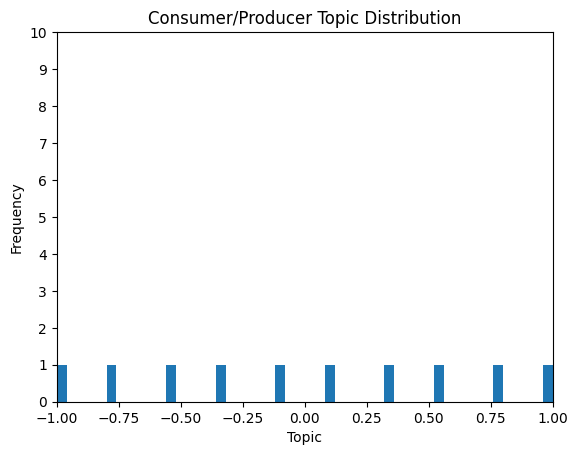

In [8]:
visualize.plot_topic_distribution_histogram("Consumer/Producer Topic Distribution", content_market.consumers, -1, 1)

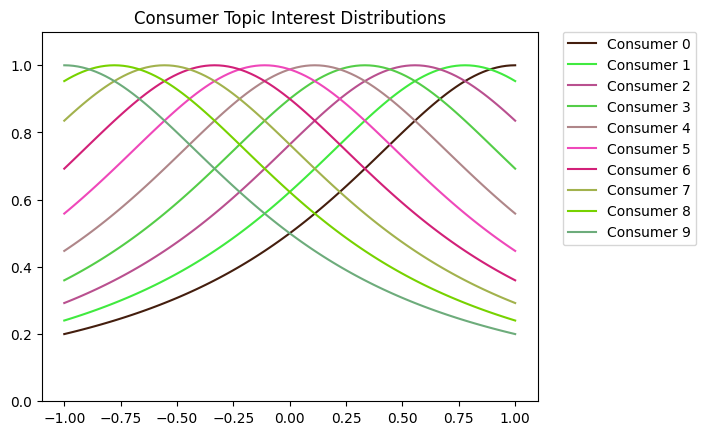

In [9]:
visualize.plot_consumer_topic_interest_distributions("Consumer Topic Interest Distributions", content_market.consumers, -1, 1, agent_colors)

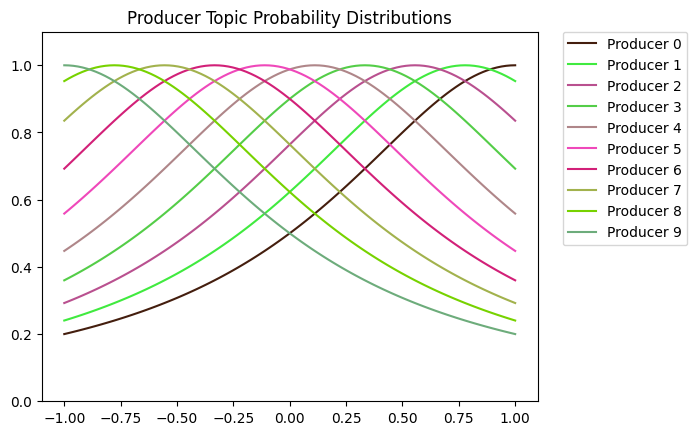

In [10]:
visualize.plot_producer_topic_probability_distributions("Producer Topic Probability Distributions", content_market.producers, -1, 1, agent_colors)

In [11]:
stats: TestStats = content_market.optimize(100, topic_position='opposite')

Optimizing consumer 0
Optimizing consumer 1
Optimizing consumer 2
Optimizing consumer 3
Optimizing consumer 4
Optimizing consumer 5
Optimizing consumer 6
Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9
Optimizing influencer 10
Optimizing producer 0
Optimization succeeded (overall 0.004514707950875163s): nit=0, nfev=2, njev=1.
Optimizing producer 1
Optimization succeeded (overall 0.0040799579583108425s): nit=0, nfev=2, njev=1.
Optimizing producer 2
Optimization succeeded (overall 0.004013166995719075s): nit=0, nfev=2, njev=1.
Optimizing producer 3
Optimization succeeded (overall 0.004001499968580902s): nit=0, nfev=2, njev=1.
Optimizing producer 4
Optimization succeeded (overall 0.003999333013780415s): nit=0, nfev=2, njev=1.
Optimizing producer 5
Optimization succeeded (overall 0.004013999947346747s): nit=0, nfev=2, njev=1.
Optimizing producer 6
Optimization succeeded (overall 0.004001375054940581s): nit=0, nfev=2, njev=1.
Optimizing producer 7
Optimization succeeded (o

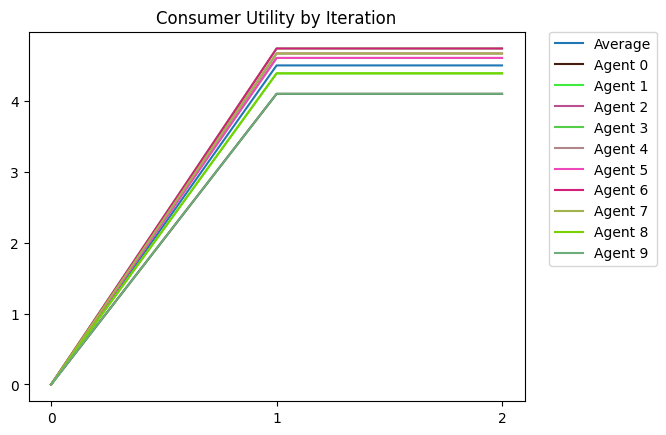

In [12]:
visualize.plot_agent_utility_by_iteration("Consumer Utility by Iteration", content_market.consumers, agent_colors, stats.consumer_stats, stats.average_consumer_utility)

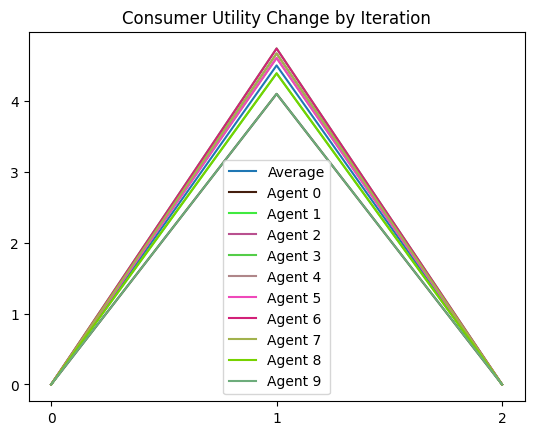

In [13]:
visualize.plot_agent_utility_change_by_iteration("Consumer Utility Change by Iteration", content_market.consumers, agent_colors, stats.consumer_stats, stats.average_consumer_utility_change)

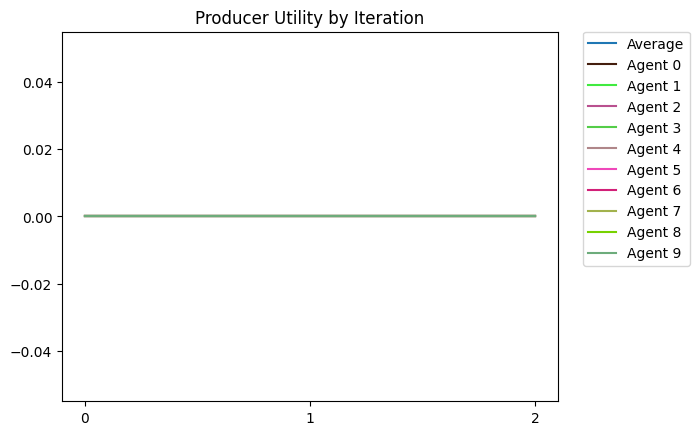

In [14]:
visualize.plot_agent_utility_by_iteration("Producer Utility by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_utility)

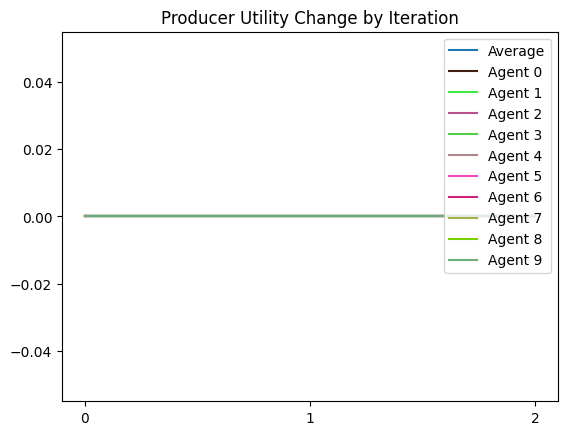

In [15]:
visualize.plot_agent_utility_change_by_iteration("Producer Utility Change by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_utility_change)

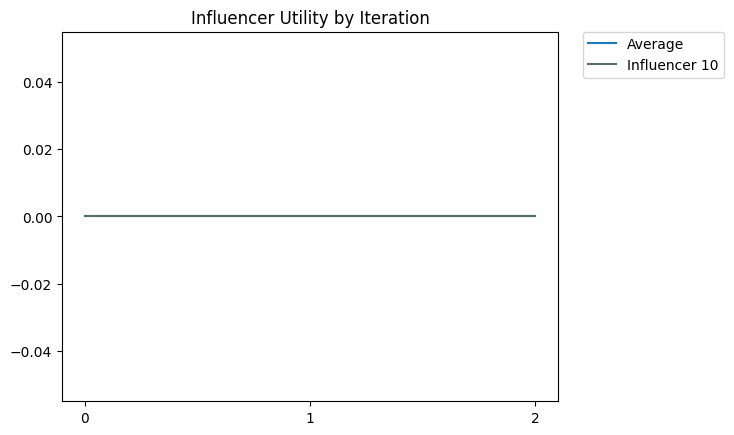

In [16]:
visualize.plot_agent_utility_by_iteration("Influencer Utility by Iteration", content_market.influencers, agent_colors, stats.influencer_stats, stats.average_influencer_utility)

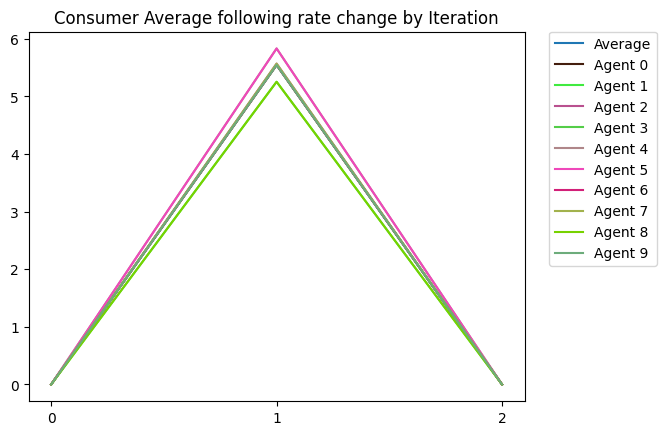

In [17]:
visualize.plot_following_rate_change_by_iteration("Consumer Average following rate change by Iteration", content_market.consumers, agent_colors, stats.consumer_stats, stats.average_consumer_rate_change)

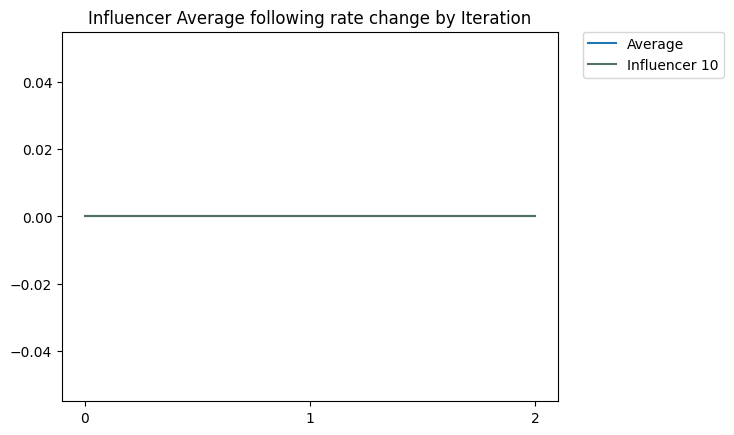

In [18]:
visualize.plot_following_rate_change_by_iteration("Influencer Average following rate change by Iteration", content_market.influencers, agent_colors, stats.influencer_stats, stats.average_influencer_rate_change)

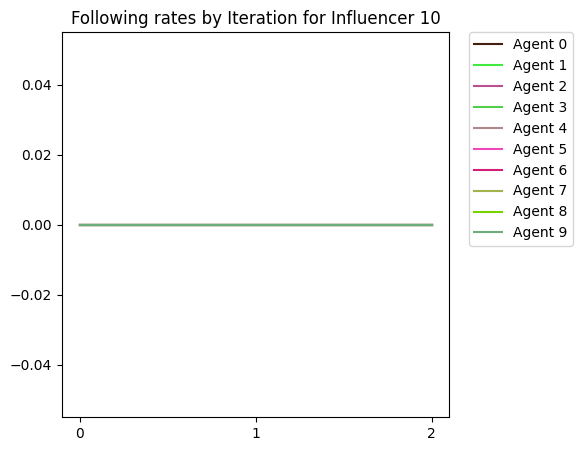

In [19]:
visualize.plot_following_rates_by_iteration(content_market.influencers, content_market.producers, agent_colors, stats.influencer_stats)

/Users/gabeguralnick/git/content-market-experiment/visualize.py:200: RuntimeWarning: invalid value encountered in scalar divide
  prod_main_interest_with_rates = [(prod.main_interest[0], agent_stats[agent.index].following_rates[-1][prod.index] / agent.attention_bound * 100) for prod in agent.market.producers if prod != agent]
/Users/gabeguralnick/git/content-market-experiment/visualize.py:204: RuntimeWarning: invalid value encountered in scalar divide
  prod_topic_produced_with_rates = [(prod.topic_produced[0], agent_stats[agent.index].following_rates[-1][prod.index] / agent.attention_bound * 100) for prod in agent.market.producers if prod != agent]


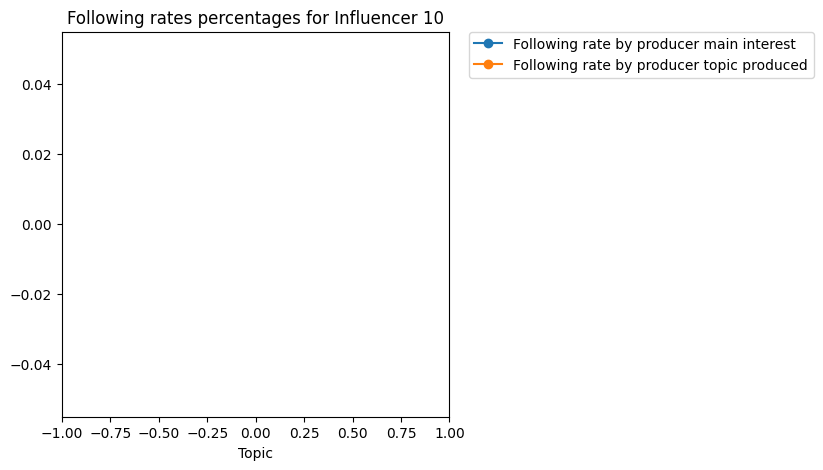

In [20]:
visualize.plot_agent_following_rates(content_market.influencers, stats.influencer_stats, agent_colors)

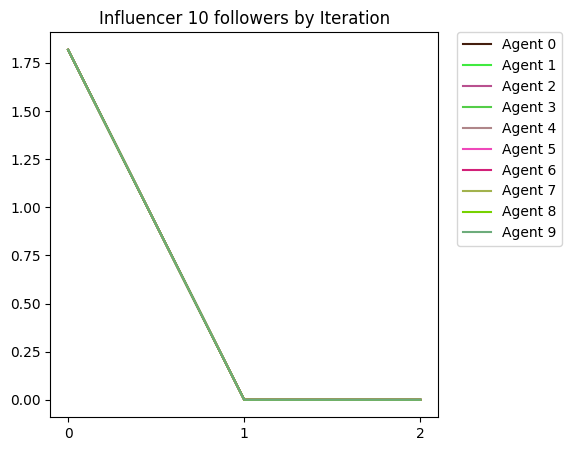

In [21]:
visualize.plot_follows_by_iteration(content_market.influencers, content_market.consumers, agent_colors, stats.consumer_stats)

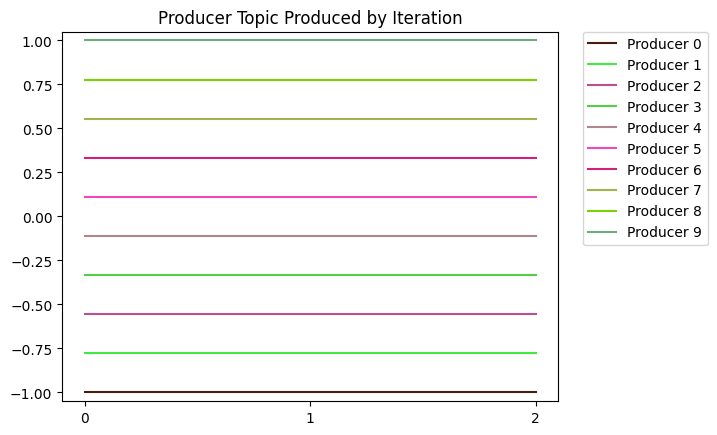

In [22]:
visualize.plot_producer_topic_produced_by_iteration("Producer Topic Produced by Iteration", content_market.producers, content_market.consumers, agent_colors, stats.producer_stats, False)

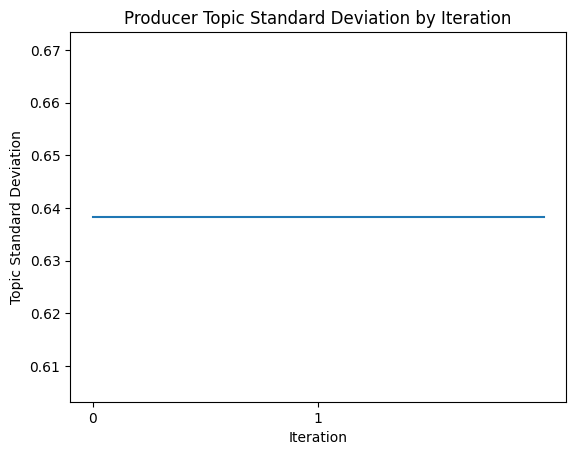

In [23]:
visualize.plot_value_by_iteration("Producer Topic Standard Deviation by Iteration", stats, "producer_topic_standard_deviation", "Topic Standard Deviation")

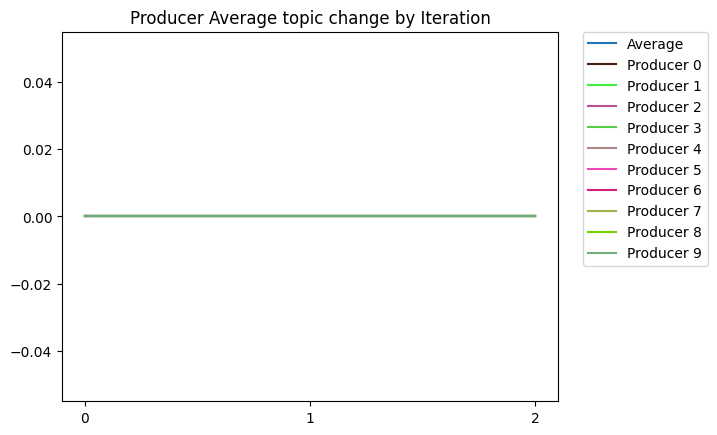

In [24]:
visualize.plot_producer_topic_change_by_iteration("Producer Average topic change by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_topic_change)

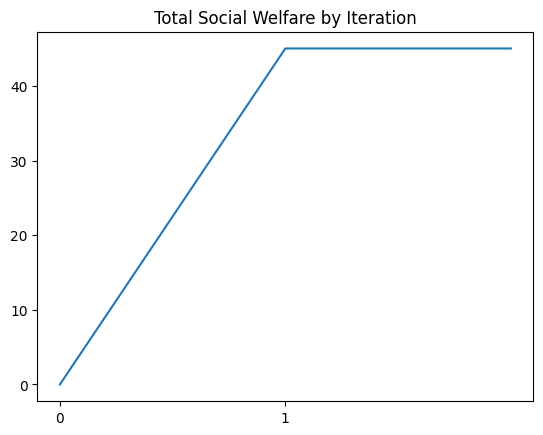

In [25]:
visualize.plot_total_social_welfare_by_iteration("Total Social Welfare by Iteration", stats)

In [26]:
import importlib
importlib.reload(visualize)

<module 'visualize' from '/Users/gabeguralnick/git/content-market-experiment/visualize.py'>

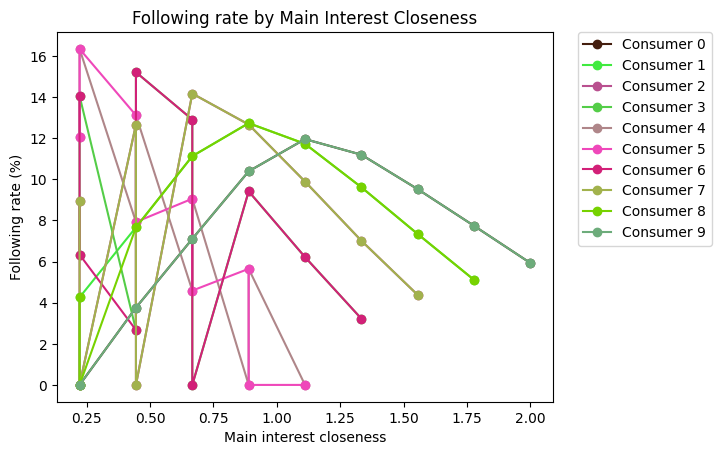

In [27]:
visualize.plot_following_rate_by_main_interest_closeness("Following rate by Main Interest Closeness", content_market.consumers, content_market.producers, agent_colors, stats.consumer_stats)

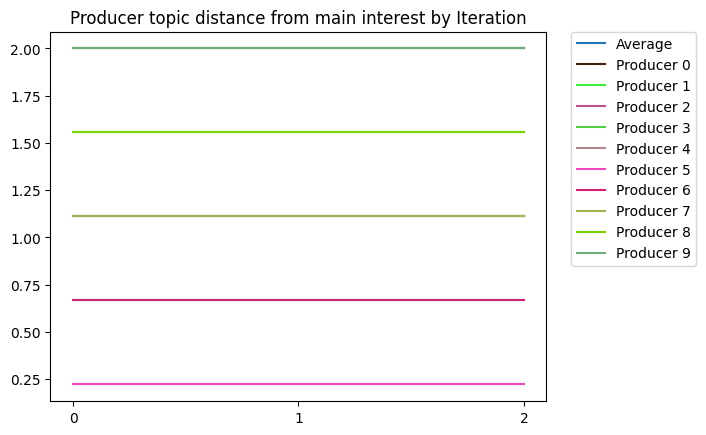

In [28]:
visualize.plot_producer_topic_distance_from_main_interest_by_iteration("Producer topic distance from main interest by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_topic_distance_from_main_interest)

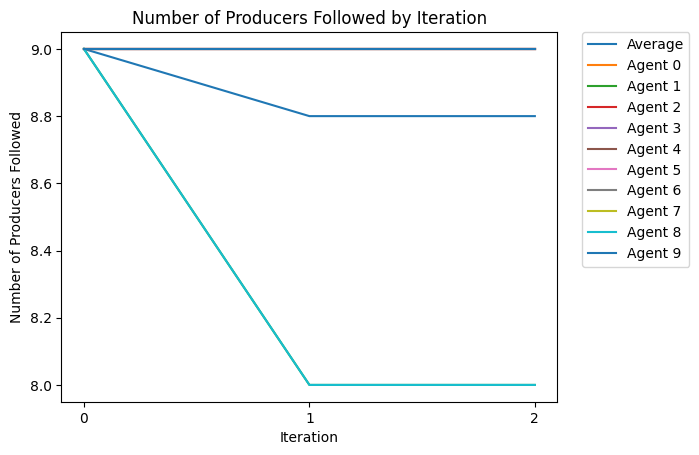

In [29]:
visualize.plot_value_by_agent_by_iteration("Number of Producers Followed by Iteration", stats.consumer_stats, "num_producers_followed", "Number of Producers Followed", stats.average_consumer_num_producers_followed)

[[ 1.         -0.35355339]
 [-0.35355339  1.        ]]


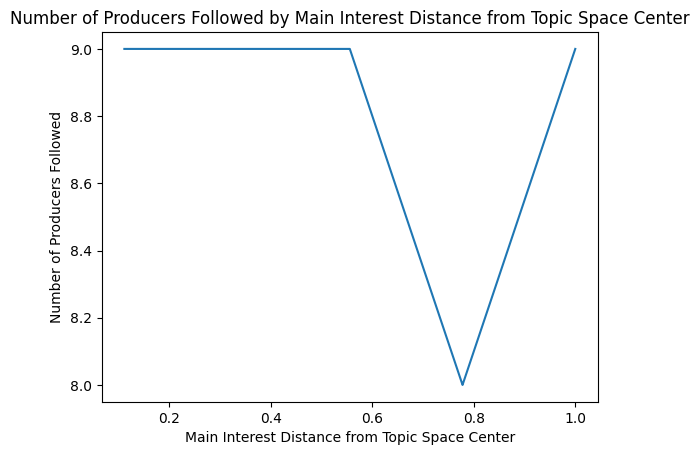

In [30]:
num_prods_by_main_interest_magnitude = []
topic_center = np.array([(bound[0] + bound[1]) / 2 for bound in content_market.topics_bounds])

for consumer in content_market.consumers:
    main_interest_mag = np.linalg.norm(consumer.main_interest - topic_center)
    num_prods_by_main_interest_magnitude.append((main_interest_mag, stats.consumer_stats[consumer.index].num_producers_followed[-1]))

num_prods_by_main_interest_magnitude.sort(key=lambda x: x[0])
print(np.corrcoef([x[0] for x in num_prods_by_main_interest_magnitude], [x[1] for x in num_prods_by_main_interest_magnitude]))
plt.figure()
plt.plot([x[0] for x in num_prods_by_main_interest_magnitude], [x[1] for x in num_prods_by_main_interest_magnitude])
plt.xlabel("Main Interest Distance from Topic Space Center")
plt.ylabel("Number of Producers Followed")
plt.title("Number of Producers Followed by Main Interest Distance from Topic Space Center")
plt.show()

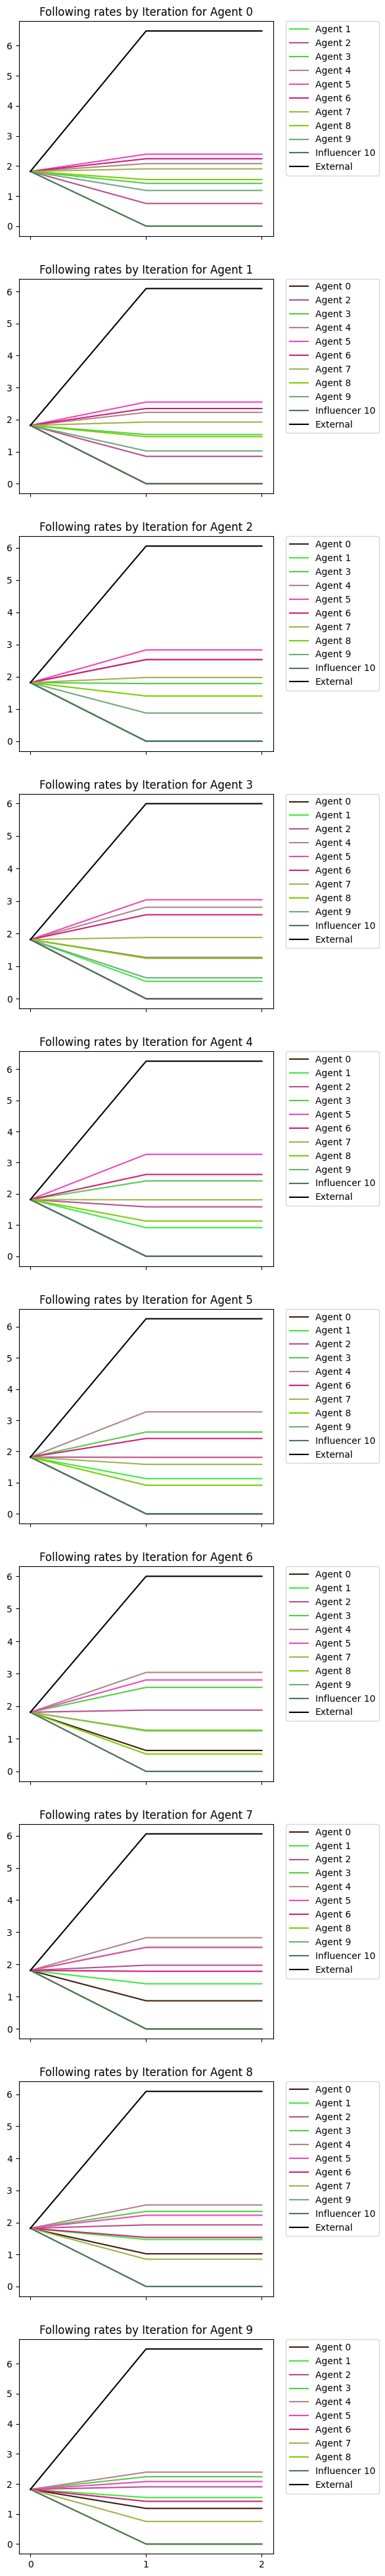

In [31]:
visualize.plot_following_rates_by_iteration(content_market.consumers, sorted(list(set(content_market.producers + content_market.influencers)), key=lambda x: x.index), agent_colors, stats.consumer_stats)

In [32]:
import importlib
importlib.reload(visualize)

<module 'visualize' from '/Users/gabeguralnick/git/content-market-experiment/visualize.py'>

ValueError: min() arg is an empty sequence

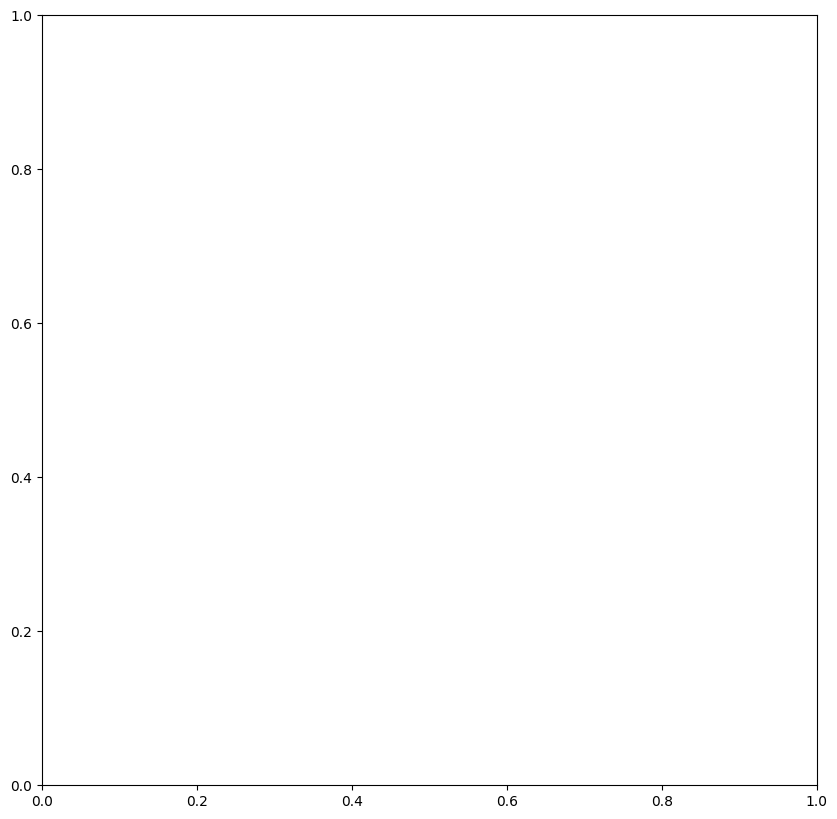

In [33]:
visualize.visualize_influencer(content_market, stats.influencer_stats[content_market.influencers[0].index], agent_colors)

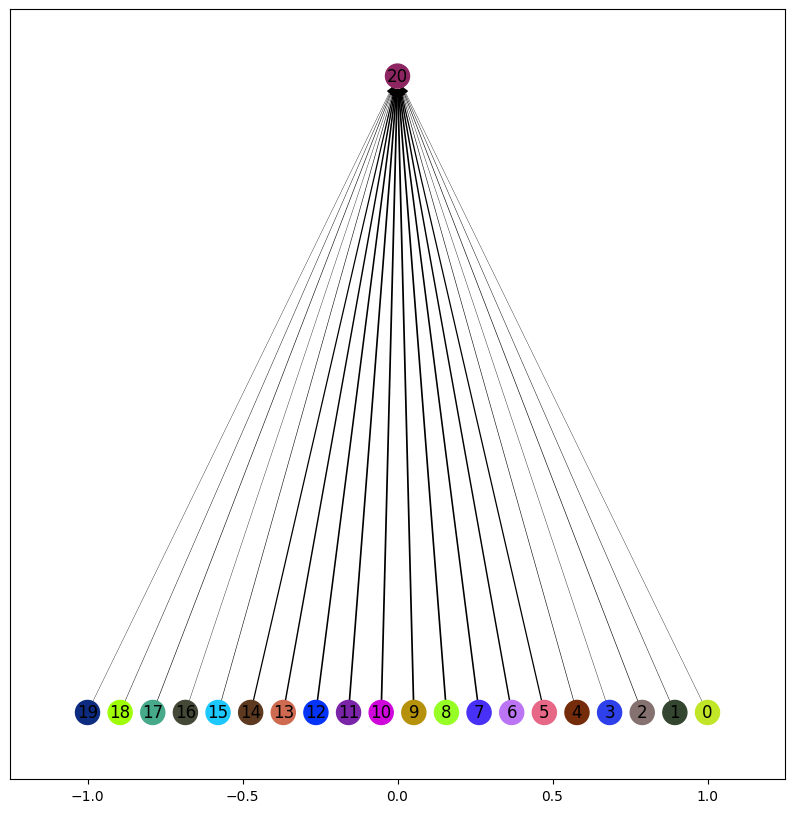

In [ ]:
visualize.visualize_influencer_followers(content_market, stats.consumer_stats, agent_colors)

{0: (1.0, 0), 1: (0.894736842105263, 0), 2: (0.7894736842105261, 0), 3: (0.6842105263157894, 0), 4: (0.5789473684210527, 0), 5: (0.4736842105263157, 0), 6: (0.36842105263157876, 0), 7: (0.26315789473684204, 0), 8: (0.1578947368421053, 0), 9: (0.05263157894736836, 0), 10: (-0.052631578947368474, 0), 11: (-0.1578947368421053, 0), 12: (-0.26315789473684215, 0), 13: (-0.368421052631579, 0), 14: (-0.4736842105263158, 0), 15: (-0.5789473684210527, 0), 16: (-0.6842105263157895, 0), 17: (-0.7894736842105263, 0), 18: (-0.8947368421052632, 0), 19: (-1.0, 0), 20: (0, 1), 'External': (1, 1)}


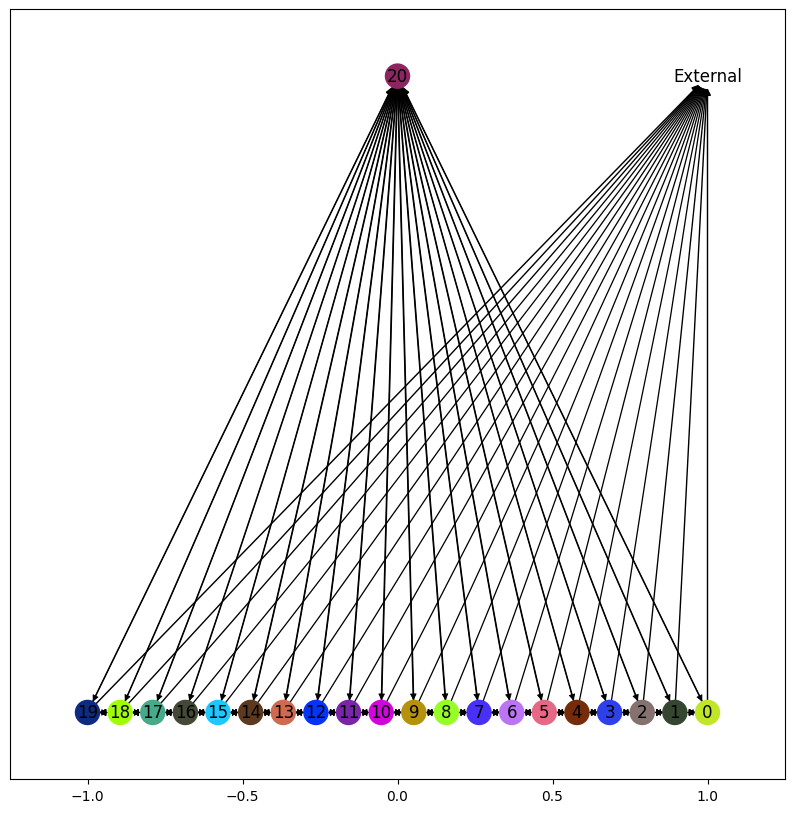

In [ ]:
visualize.visualize_market(content_market, stats, agent_colors)

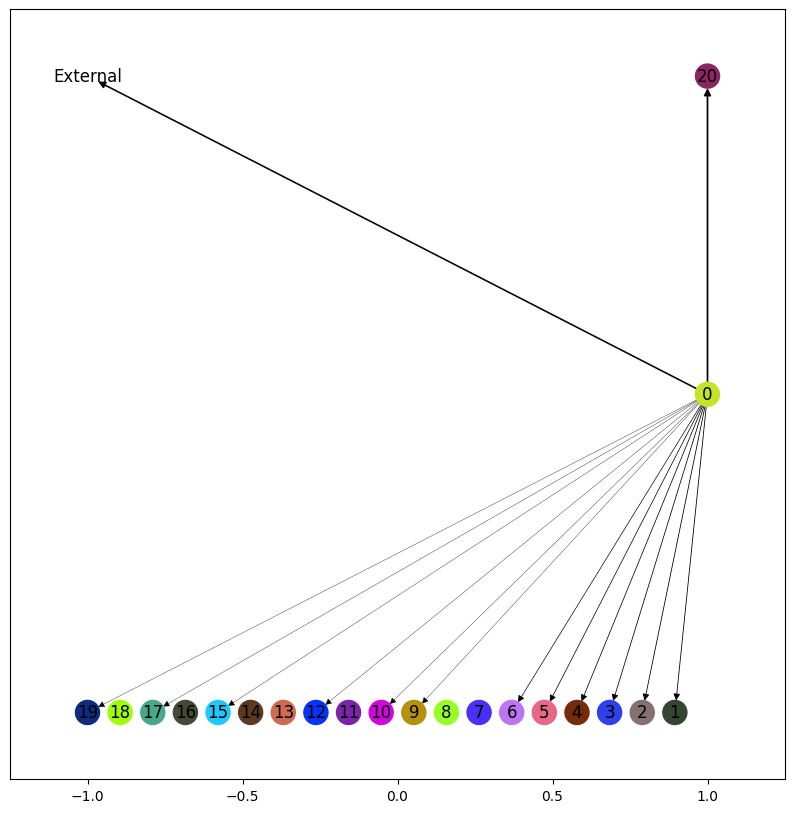

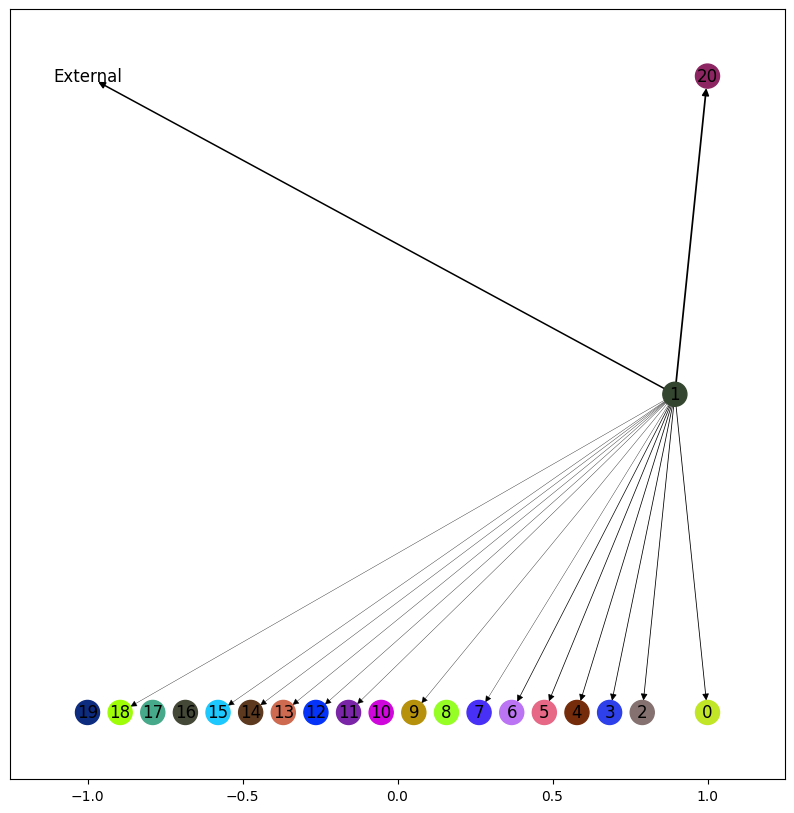

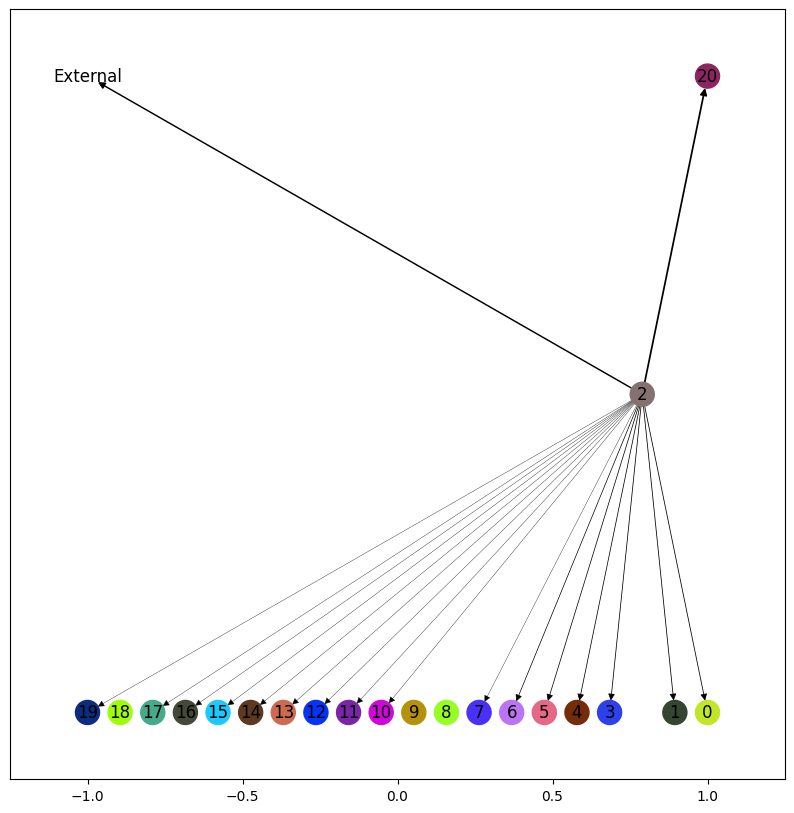

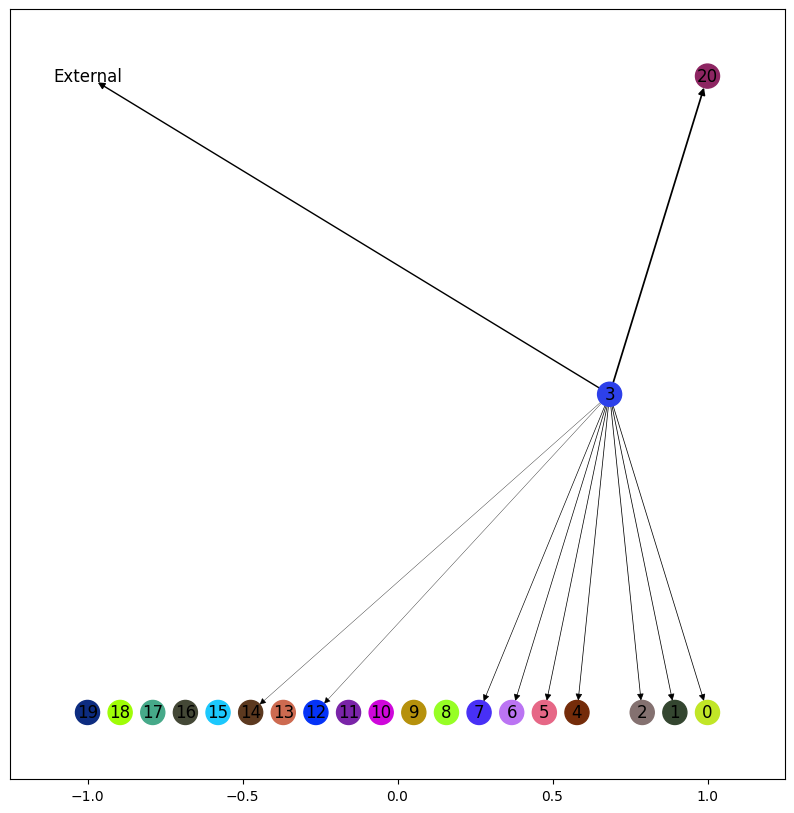

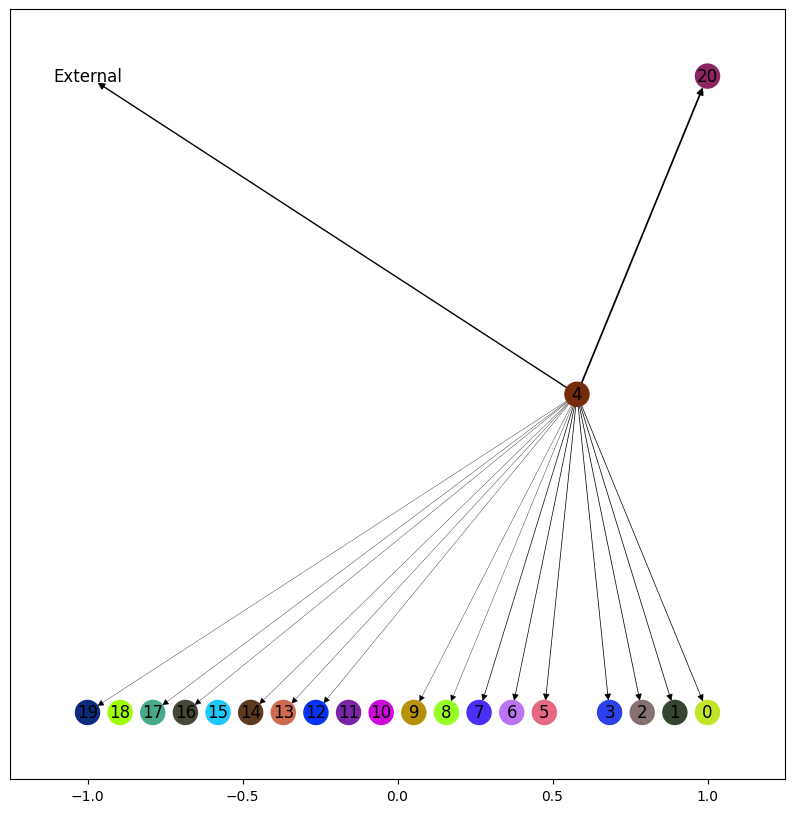

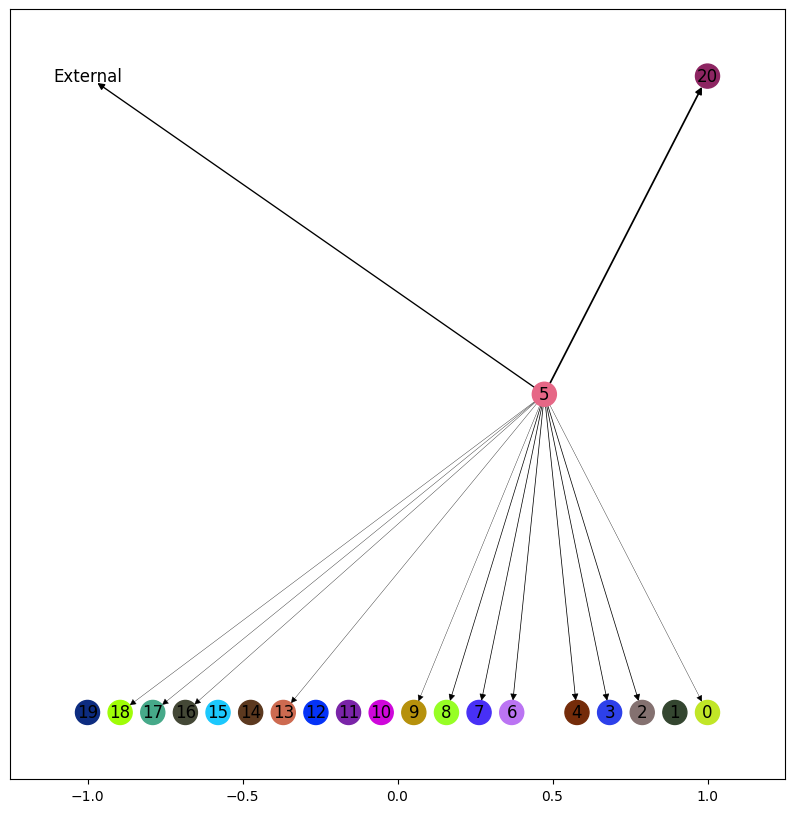

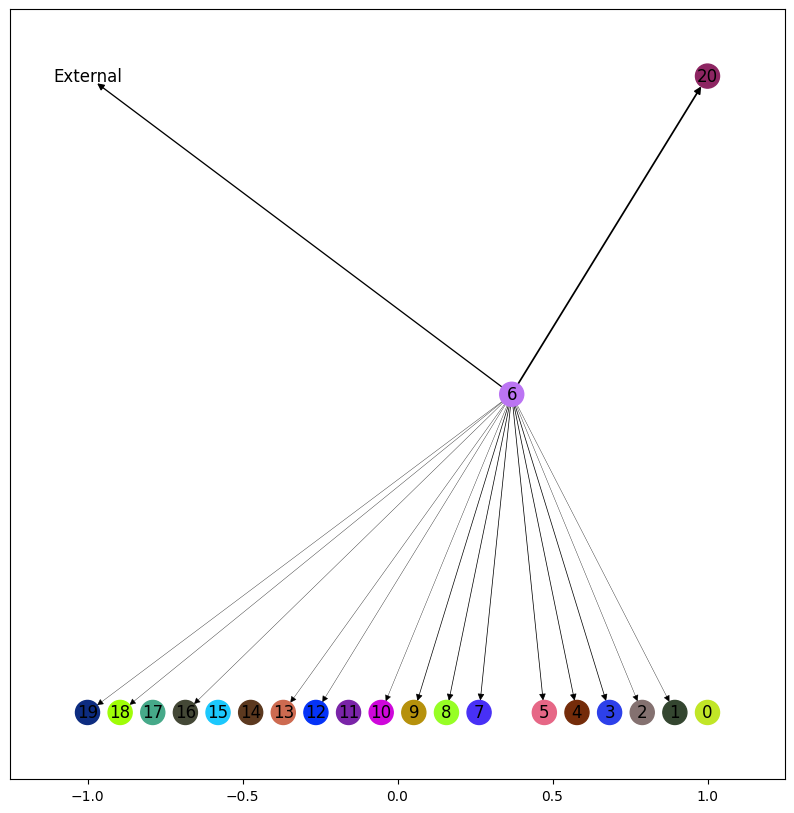

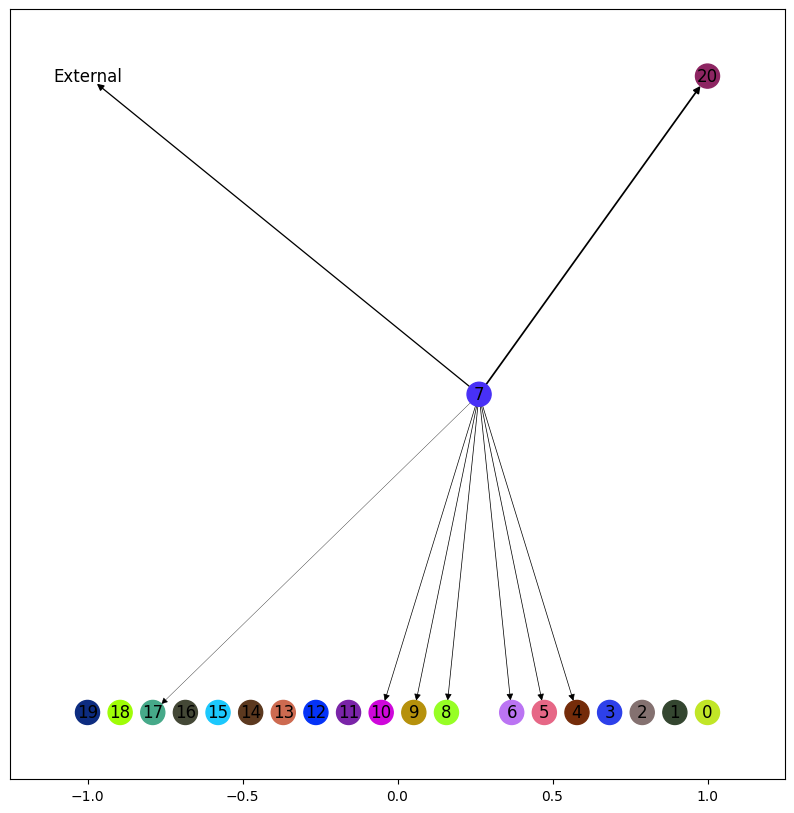

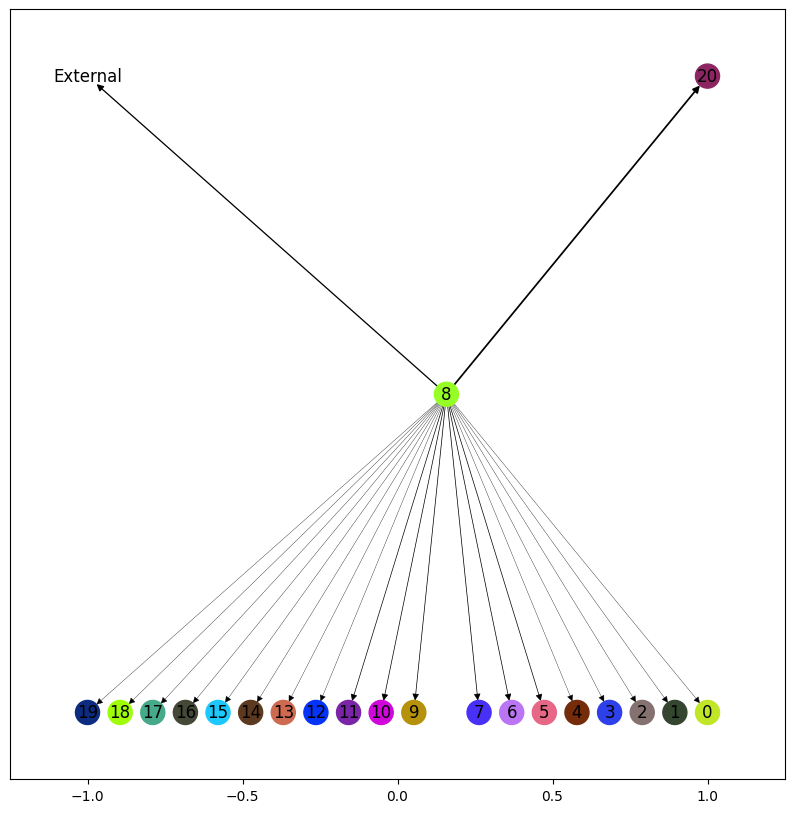

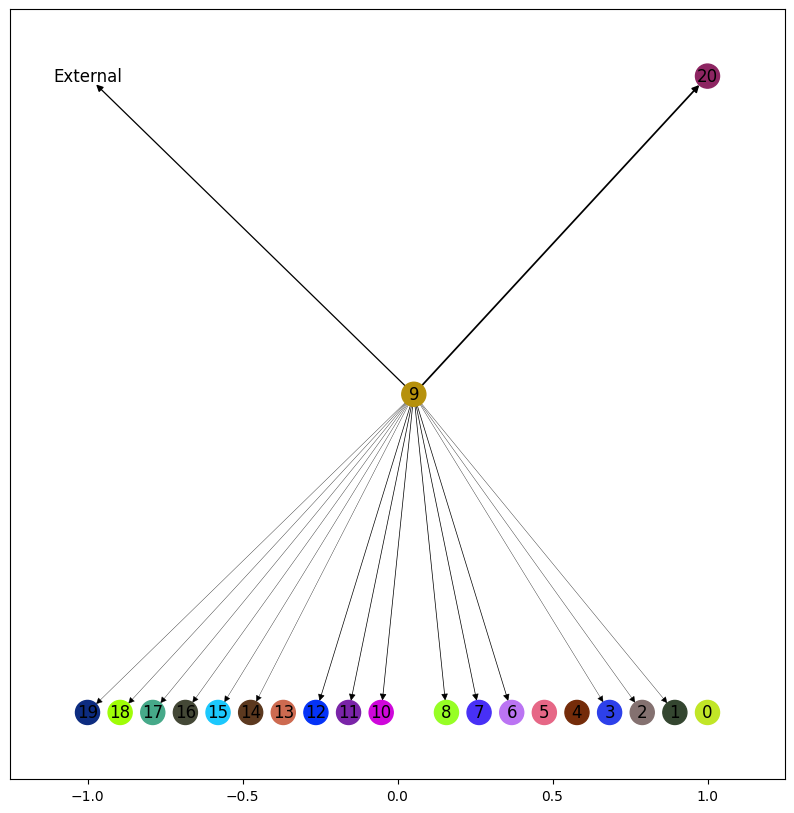

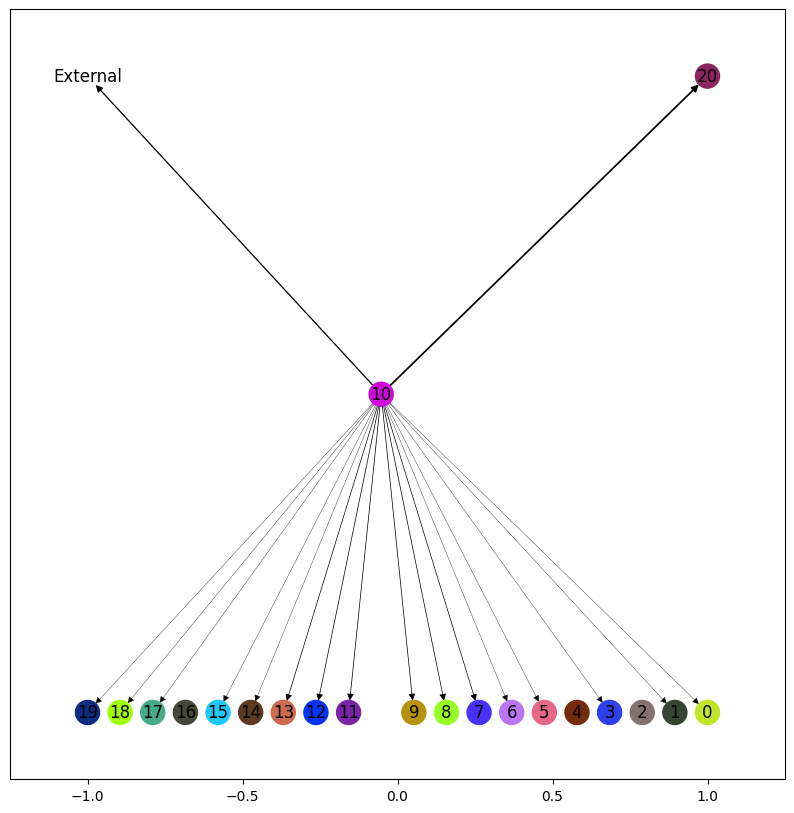

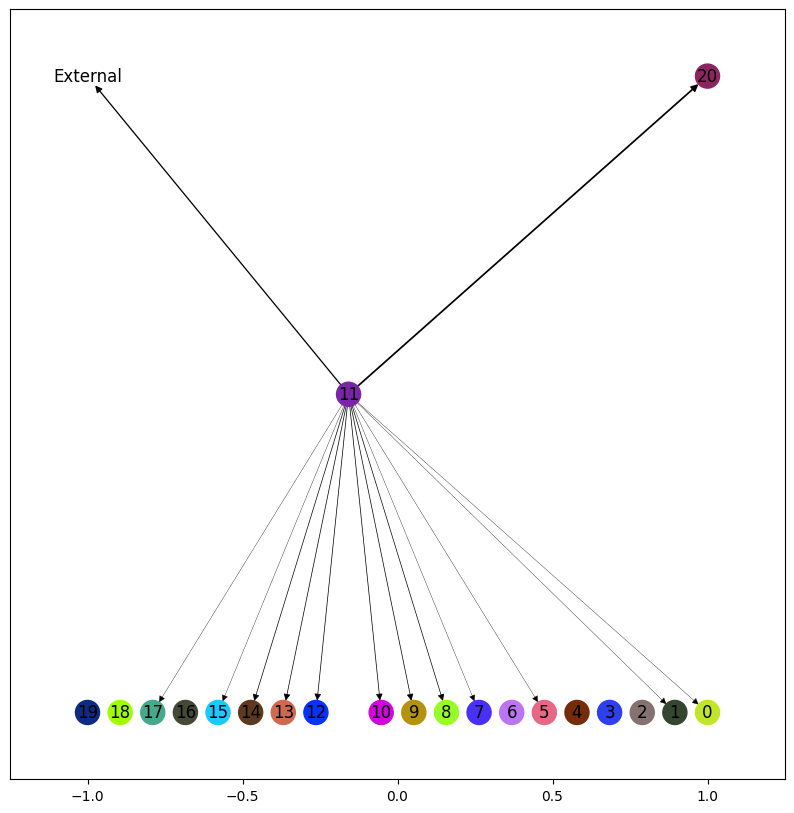

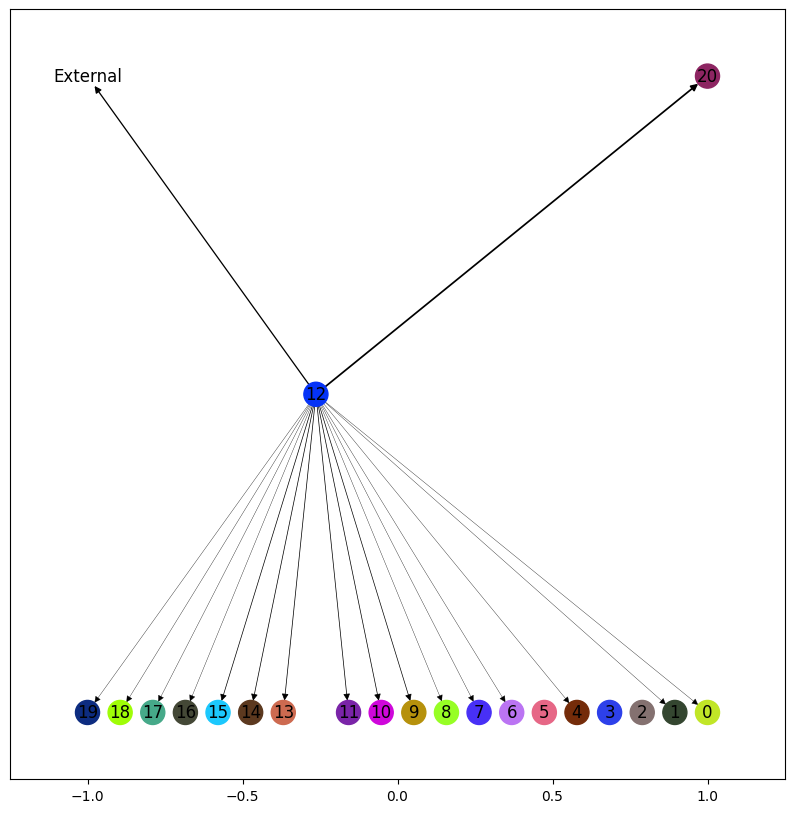

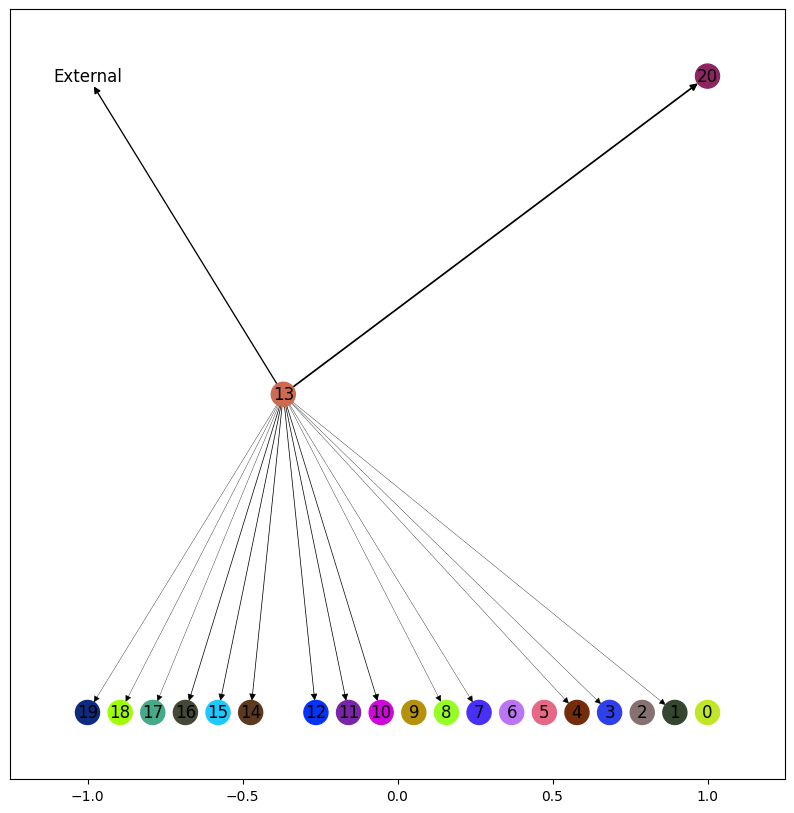

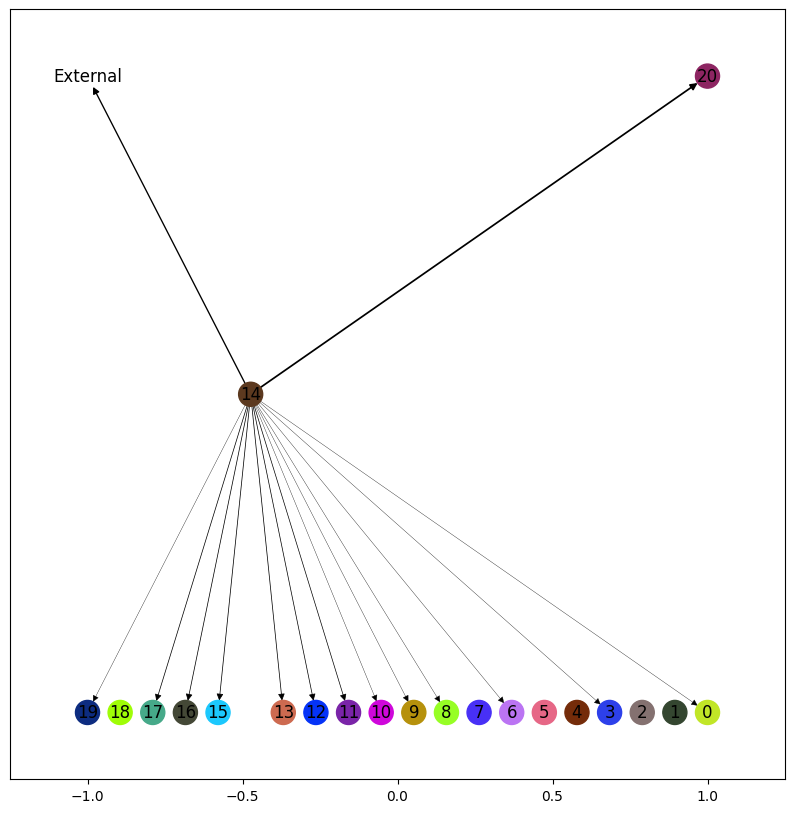

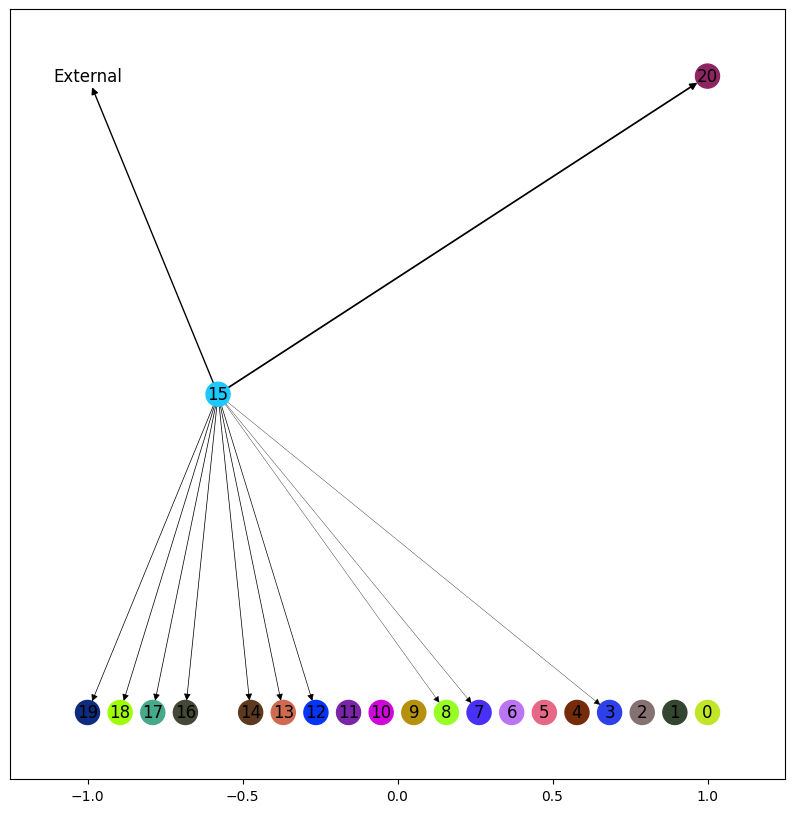

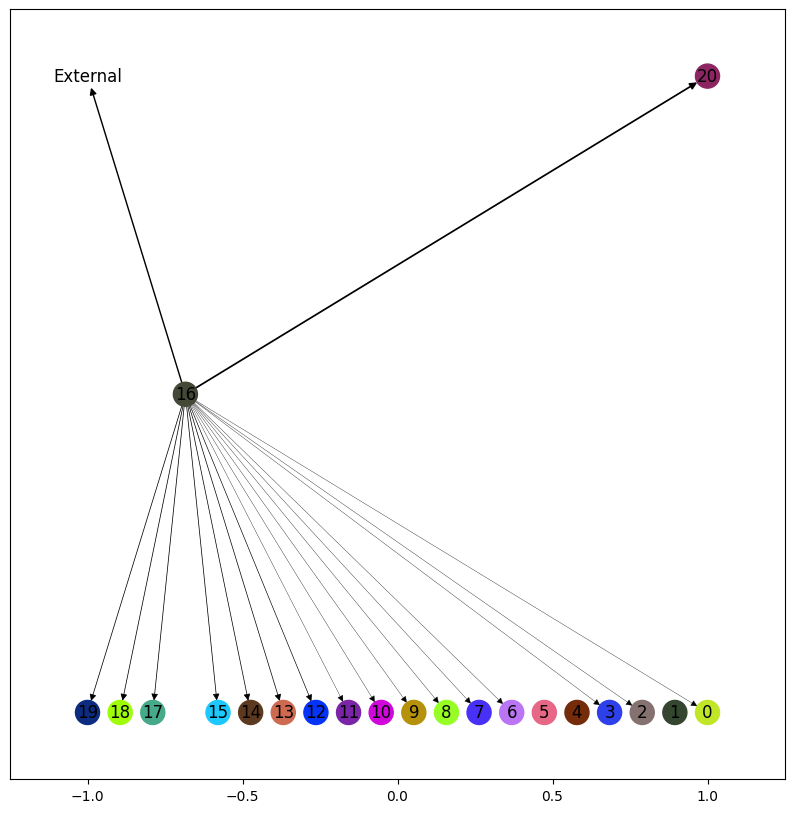

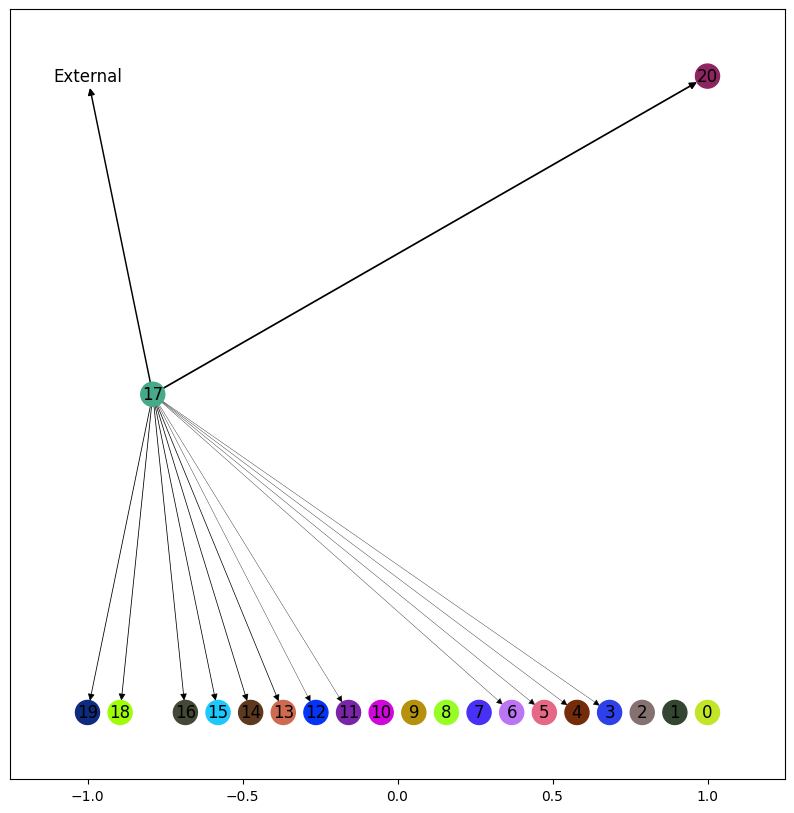

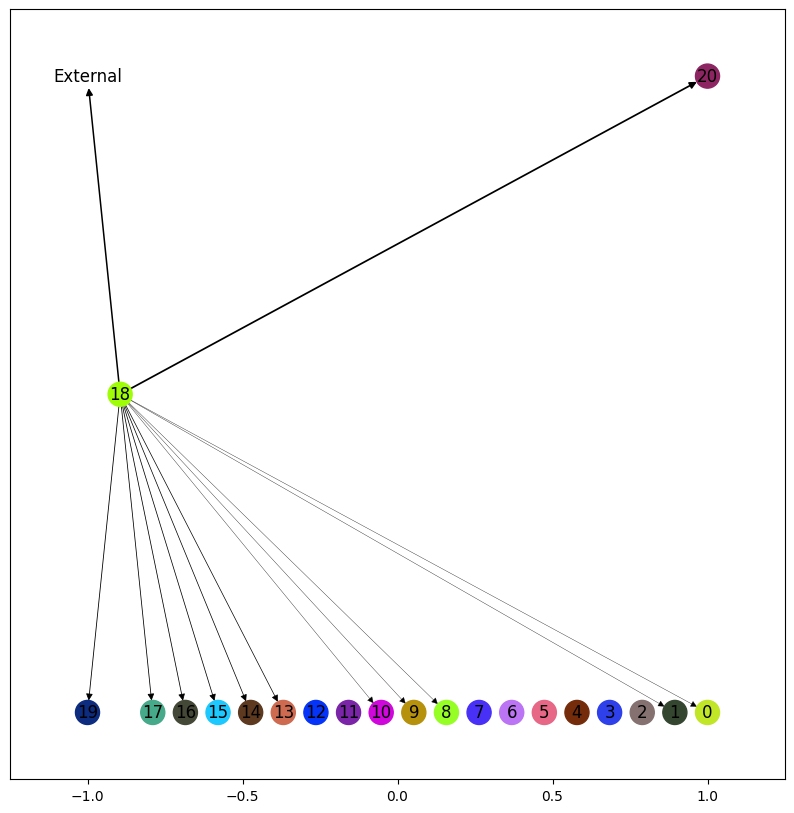

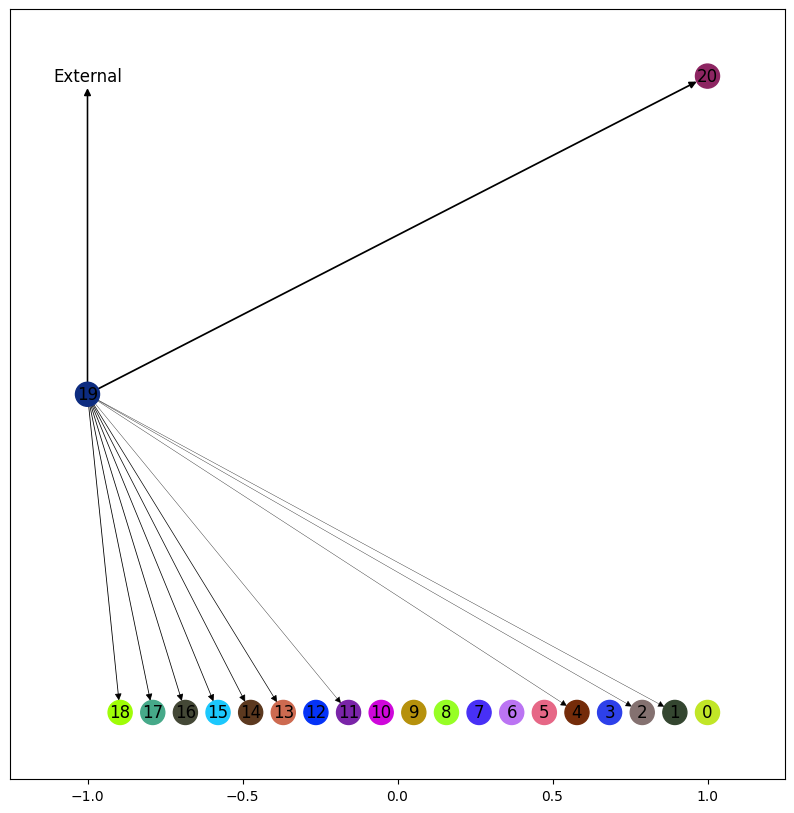

In [ ]:
for consumer in content_market.consumers:
    visualize.visualize_consumer(content_market, stats.consumer_stats[consumer.index], agent_colors)

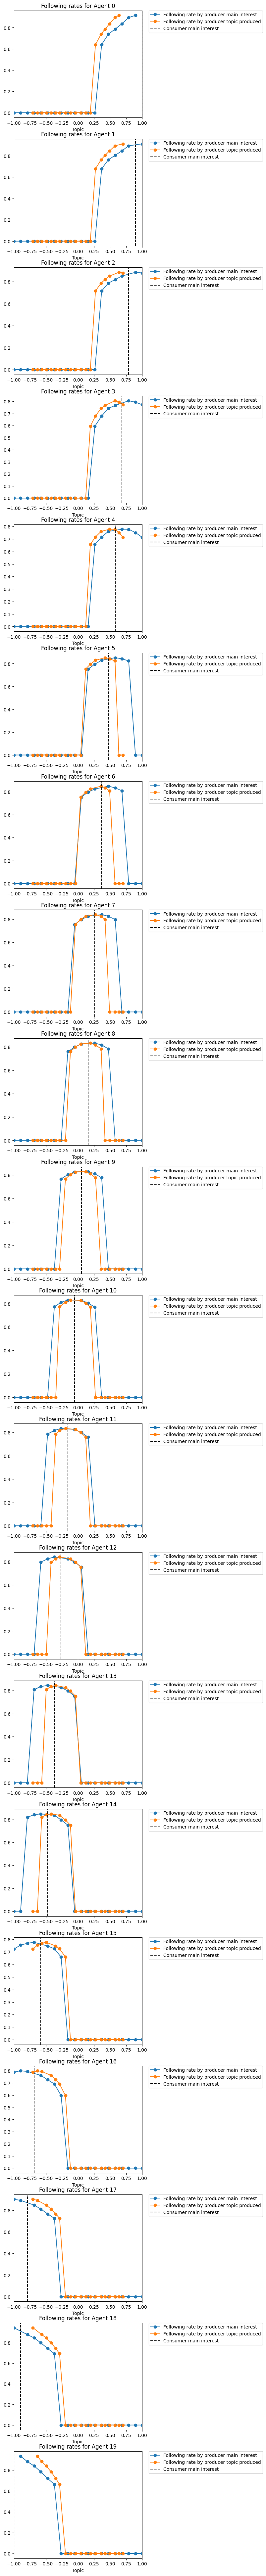

In [ ]:
visualize.plot_agent_following_rates(content_market.consumers, stats.consumer_stats, agent_colors)

In [ ]:
stats.to_dict()

{'num_iterations': 6,
 'total_consumer_utility': [0,
  138.34056681160382,
  138.72959675738247,
  138.95306995110585,
  138.79386545256318,
  138.96493467015574,
  138.94337806005396],
 'total_producer_utility': [0,
  7.323468553494875,
  7.323656975724313,
  7.32956660828588,
  7.332068814773669,
  7.333171478502611,
  7.333302949201879],
 'total_influencer_utility': [0,
  68.14841470583342,
  68.9100255420821,
  69.07040409493328,
  69.24865786149046,
  69.39540817637732,
  69.39038020480159],
 'total_social_welfare': [0,
  138.34056681160382,
  138.72959675738247,
  138.95306995110585,
  138.79386545256318,
  138.96493467015574,
  138.94337806005396],
 'average_consumer_rate_change': [0,
  3.425576192557717,
  0.19468238093439622,
  0.04949767793533413,
  0.015578855300670897,
  0.06924965800405095,
  0.02769664160925635],
 'average_producer_topic_change': [0,
  0.1124612878109815,
  0.008369041838926682,
  0.007858503694390081,
  0.026111466576395525,
  0.008934641421458427,
  0.0

In [ ]:
sorted([c.main_interest for c in content_market.consumers])

[array([-1.]),
 array([-0.89473684]),
 array([-0.78947368]),
 array([-0.68421053]),
 array([-0.57894737]),
 array([-0.47368421]),
 array([-0.36842105]),
 array([-0.26315789]),
 array([-0.15789474]),
 array([-0.05263158]),
 array([0.05263158]),
 array([0.15789474]),
 array([0.26315789]),
 array([0.36842105]),
 array([0.47368421]),
 array([0.57894737]),
 array([0.68421053]),
 array([0.78947368]),
 array([0.89473684]),
 array([1.])]